In [4]:
!pip install kaggle

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"malikslbn","key":"4d9c7b77012d08d28e978eeb8c41ddae"}'}

In [9]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [10]:
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d ealtman2019/ibm-transactions-for-anti-money-laundering-aml

Dataset URL: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml
License(s): Community Data License Agreement - Sharing - Version 1.0
100% 7.41G/7.42G [01:33<00:00, 94.3MB/s]
100% 7.42G/7.42G [01:33<00:00, 85.2MB/s]


In [ ]:
!unzip ibm-transactions-for-anti-money-laundering-aml.zip

Archive:  ibm-transactions-for-anti-money-laundering-aml.zip
  inflating: HI-Large_Patterns.txt   
  inflating: HI-Large_Trans.csv      
  inflating: HI-Medium_Patterns.txt  
  inflating: HI-Medium_Trans.csv     
  inflating: HI-Small_Patterns.txt   
  inflating: HI-Small_Trans.csv      
  inflating: LI-Large_Patterns.txt   
  inflating: LI-Large_Trans.csv      
  inflating: LI-Medium_Patterns.txt  
  inflating: LI-Medium_Trans.csv     

In [13]:
import pandas as pd

In [15]:
df = pd.read_csv('HI-Small_Trans.csv')

In [17]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [18]:
df.to_csv('HI-Small_Trans_modified.csv', index=False)

In [19]:
from google.colab import files
files.download('HI-Small_Trans.csv')  # Replace with 'HI-Small_Trans_modified.csv' if using the modified version

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [21]:
df.isna().sum()

,0
Timestamp,0
From Bank,0
Account,0
To Bank,0
Account.1,0
Amount Received,0
Receiving Currency,0
Amount Paid,0
Payment Currency,0
Payment Format,0


In [22]:
df.duplicated().sum()

9

In [24]:
df.shape

(5078345, 11)

In [25]:
df.dtypes

,0
Timestamp,object
From Bank,int64
Account,object
To Bank,int64
Account.1,object
Amount Received,float64
Receiving Currency,object
Amount Paid,float64
Payment Currency,object
Payment Format,object


In [27]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df['From Bank']= df['From Bank'].astype('object')
df['To Bank']= df['To Bank'].astype("object")
df['Is Laundering'] = df["Is Laundering"].astype('object')

In [28]:
df.dtypes

,0
Timestamp,datetime64[ns]
From Bank,object
Account,object
To Bank,object
Account.1,object
Amount Received,float64
Receiving Currency,object
Amount Paid,float64
Payment Currency,object
Payment Format,object


#Outlier

<Axes: >

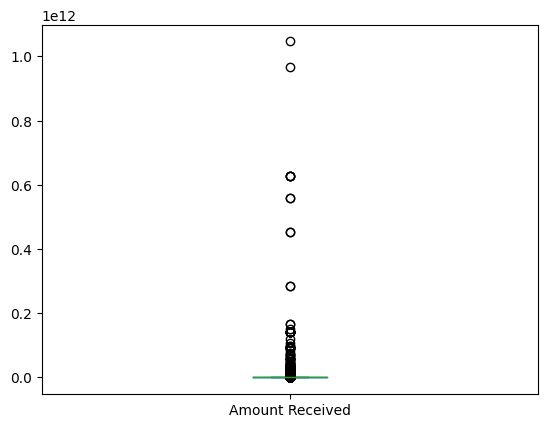

In [29]:
df['Amount Received'].plot(kind='box')

#Univariate Analysis


In [30]:
df.columns

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')

In [31]:
df['Date']=df["Timestamp"].dt.date

In [32]:
df['Time']=df["Timestamp"].dt.time

In [34]:
df.head(20)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,Date,Time
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0,2022-09-01,00:20:00
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0,2022-09-01,00:20:00
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0,2022-09-01,00:00:00
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0,2022-09-01,00:02:00
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0,2022-09-01,00:06:00
5,2022-09-01 00:03:00,1,8000F5AD0,1,8000F5AD0,6162.44,US Dollar,6162.44,US Dollar,Reinvestment,0,2022-09-01,00:03:00
6,2022-09-01 00:08:00,1,8000EBAC0,1,8000EBAC0,14.26,US Dollar,14.26,US Dollar,Reinvestment,0,2022-09-01,00:08:00
7,2022-09-01 00:16:00,1,8000EC1E0,1,8000EC1E0,11.86,US Dollar,11.86,US Dollar,Reinvestment,0,2022-09-01,00:16:00
8,2022-09-01 00:26:00,12,8000EC280,2439,8017BF800,7.66,US Dollar,7.66,US Dollar,Credit Card,0,2022-09-01,00:26:00
9,2022-09-01 00:21:00,1,8000EDEC0,211050,80AEF5310,383.71,US Dollar,383.71,US Dollar,Credit Card,0,2022-09-01,00:21:00


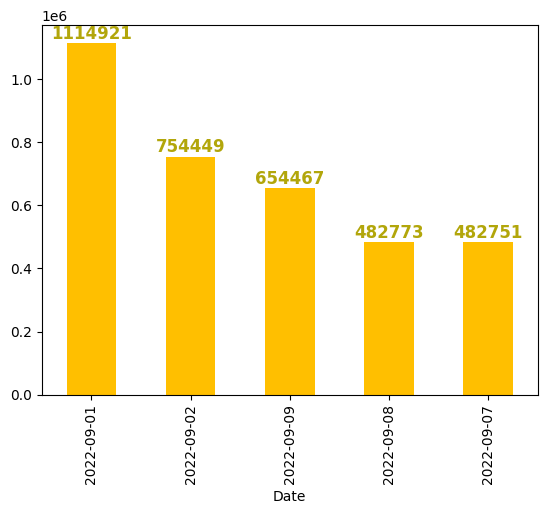

In [53]:
import matplotlib.pyplot as plt

# Plot the bar chart
ax = df['Date'].value_counts().head().plot(kind='bar', color='#FFBF00')

# Annotate each bar with its corresponding value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text on top of each bar
                ha='center', va='baseline', fontsize=12, color='#b2a60b', xytext=(0, 3), fontweight='bold',  # Offset the text slightly above the bar
                textcoords='offset points')

# Show the plot
plt.show()


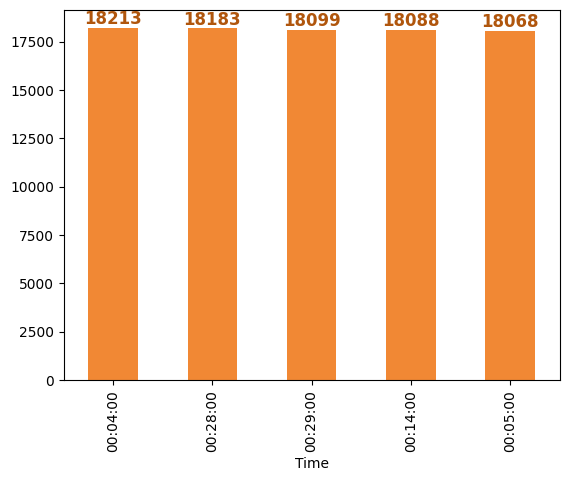

In [54]:
# Plot the bar chart
ax = df['Time'].value_counts().head().plot(kind='bar', color='#f18834')

# Annotate each bar with its corresponding value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the text on top of each bar
                ha='center', va='baseline', fontsize=12, color='#b0560d', xytext=(0, 3), fontweight='bold', # Offset the text slightly above the bar
                textcoords='offset points')

# Show the plot
plt.show()



**List Question:**
*   From which bank most of the txn are happened?
*   From which acc most of the txn are Happened?


*   To which bank most of the txn are happened?
*   To which acc most of the txn are happened?




In [40]:
df['Amount Received'].max()

1046302363293.48

In [42]:
df['Amount Received'].min()

1e-06

In [44]:
df['Amount Received'].mean()

5988726.070072798

In [46]:
df['Amount Paid'].mean()

4509273.3677414

In [47]:
df['Payment Currency'].unique()

array(['US Dollar', 'Bitcoin', 'Euro', 'Australian Dollar', 'Yuan',
       'Rupee', 'Yen', 'Mexican Peso', 'UK Pound', 'Ruble',
       'Canadian Dollar', 'Swiss Franc', 'Brazil Real', 'Saudi Riyal',
       'Shekel'], dtype=object)

In [55]:
df['Payment Format'].unique()

array(['Reinvestment', 'Cheque', 'Credit Card', 'ACH', 'Cash', 'Wire',
       'Bitcoin'], dtype=object)

In [56]:
df['Is Laundering'].value_counts()

,count
Is Laundering,
0,5073168
1,5177
